High_Frequency_Table:    word  Frequncy
0    八卦      1115
1    什麼       961
2    怎麼       555
3    台灣       537
4   是不是       444
..  ...       ...
95   高雄        46
96   男生        46
97   好像        45
98   代表        45
99   最好        45

[100 rows x 2 columns]
Frequency_Table:


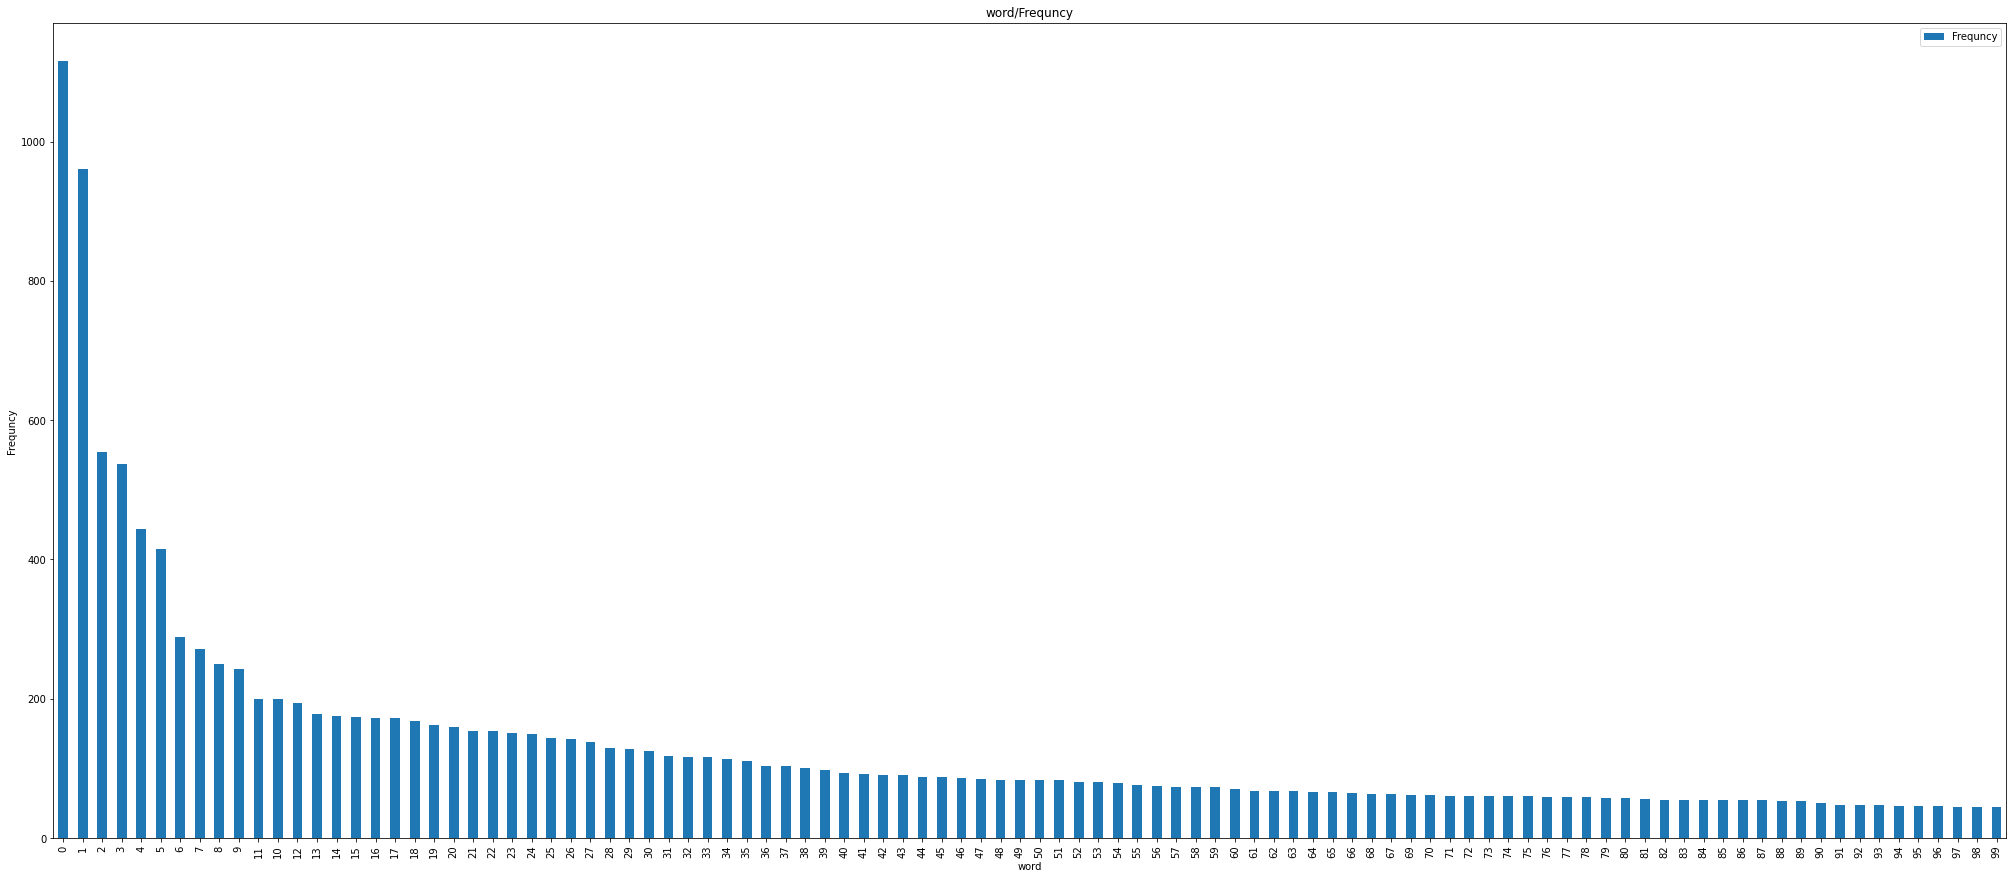

Weight_Table    word    TF-IDF
0    什麼  0.194066
1    八卦  0.162799
2    台灣  0.117160
3    怎麼  0.109951
4    肥宅  0.060883
..  ...       ...
95   韓國  0.007610
96   新聞  0.007610
97   電影  0.007410
98   電腦  0.007410
99  金城武  0.007219

[100 rows x 2 columns]
Weight_Table:


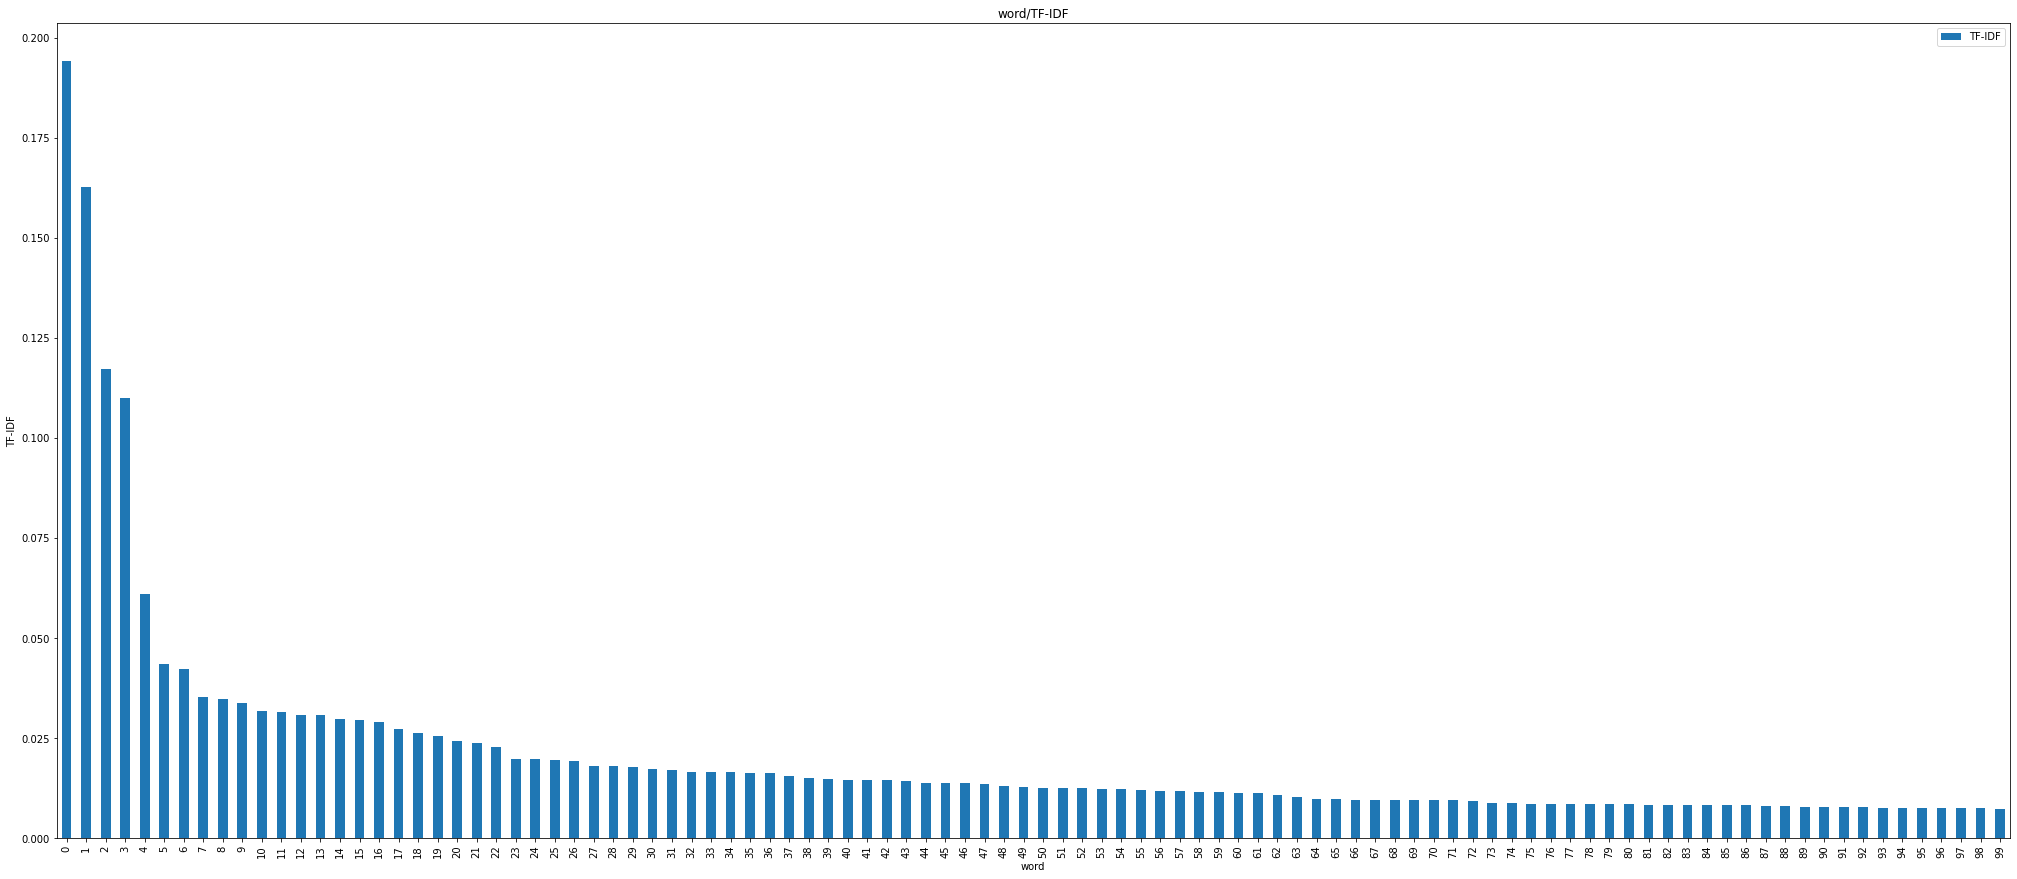

In [38]:
import jieba
import jieba.analyse
import re
import pandas as pd
import matplotlib.pyplot as plt

# print("helloWorld")
# print("testcommit")


def HighFrequency():
    txt = open("HW1.txt", encoding="utf-8").read()
    ch =re.compile("[\u4e00-\u9fa5]")
    hyphenationWord =  "".join(ch.findall(txt))
    cut = jieba.lcut(hyphenationWord)

    counts = {}
    for i in cut :
        if(len(i)>1):
            counts[i] = counts.get(i,0) + 1

    items = list(counts.items())  
    items.sort(key=lambda x:x[1], reverse=True)

    i=0
    while True:
        i+=1
        word, count = items[i]  
        if i==100:
            break

    df = pd.DataFrame(items, columns = ["word", "Frequncy"]).sort_values(['Frequncy'],ascending=[False])[0:100]
    print('High_Frequency_Table:',df)
    print('Frequency_Table:')
    chart = df.plot( kind ='bar',
                    title = 'word/Frequncy',
                    xlabel = 'word',
                    ylabel = 'Frequncy',
                    figsize = (35,15))
    plt.show()
    # plt()

def TF_IDF():
    txt = open("HW1.txt", encoding="utf-8").read()
    tags = jieba.analyse.extract_tags(txt, topK=100, withWeight=True)

    df = pd.DataFrame(tags, columns = ["word", "TF-IDF"]) 
    print('Weight_Table',df)
    print('Weight_Table:')
    chart = df.plot( kind ='bar',
                    title = 'word/TF-IDF',
                    xlabel = 'word',
                    ylabel = 'TF-IDF',
                    figsize = (35,15))
    plt.show()

def main():
    HighFrequency()
    TF_IDF()

if __name__ == "__main__": 
    main() 
